<a href="https://colab.research.google.com/github/Kishankumar1328/naive-bayes/blob/main/Navie_Bayes(GaussianNB)classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/results.csv")

In [ ]:
df

,Unnamed: 0,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
0,0,65,10,59,3,71,37,245,0,3
1,1,94,56,4,67,91,50,362,1,1
2,2,7,85,76,99,60,25,352,0,2
3,3,88,46,59,94,52,38,377,1,1
4,4,39,81,37,38,6,54,255,1,3
...,...,...,...,...,...,...,...,...,...,...
995,995,55,89,68,58,13,13,296,0,2
996,996,42,62,25,87,51,68,335,1,2
997,997,9,83,70,14,11,78,265,0,3
998,998,23,82,31,42,84,52,314,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1000 non-null   int64
 1   Hindi       1000 non-null   int64
 2   English     1000 non-null   int64
 3   Science     1000 non-null   int64
 4   Maths       1000 non-null   int64
 5   History     1000 non-null   int64
 6   Geograpgy   1000 non-null   int64
 7   Total       1000 non-null   int64
 8   Results     1000 non-null   int64
 9   Div         1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


In [ ]:
NB=GaussianNB()

In [ ]:
x = df.loc[:, ["Hindi","English","Science","Maths","History","Geograpgy","Total"]]  # Features
y = df["Results"]  # Target
new=pd.DataFrame(x,y)
print(new)

         Hindi  English  Science  Maths  History  Geograpgy  Total
Results                                                           
0           65       10       59      3       71         37    245
1           94       56        4     67       91         50    362
0           65       10       59      3       71         37    245
1           94       56        4     67       91         50    362
1           94       56        4     67       91         50    362
...        ...      ...      ...    ...      ...        ...    ...
0           65       10       59      3       71         37    245
1           94       56        4     67       91         50    362
0           65       10       59      3       71         37    245
0           65       10       59      3       71         37    245
1           94       56        4     67       91         50    362

[1000 rows x 7 columns]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
x_train

,Hindi,English,Science,Maths,History,Geograpgy,Total
457,82,2,5,43,20,64,216
875,97,63,26,31,93,75,385
573,89,90,99,90,63,36,467
676,41,26,70,73,40,47,297
29,93,41,42,98,72,84,430
...,...,...,...,...,...,...,...
906,11,71,69,89,26,70,336
989,10,4,65,3,46,26,154
408,80,98,36,71,18,86,389
603,81,85,16,36,64,9,291


In [ ]:
y_train

457    0
875    0
573    1
676    1
29     1
      ..
906    0
989    0
408    1
603    0
657    0
Name: Results, Length: 800, dtype: int64

In [ ]:
NB.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=NB.predict(x_test)

In [ ]:
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
accuracy=(accuracy_score(y_test,y_pred))
print("accuracy_score:",accuracy)

accuracy_score: 0.825


In [ ]:
print("classification_reports",(classification_report(y_test,y_pred)))

classification_reports               precision    recall  f1-score   support

           0       0.89      0.84      0.86       133
           1       0.72      0.79      0.75        67

    accuracy                           0.82       200
   macro avg       0.80      0.82      0.81       200
weighted avg       0.83      0.82      0.83       200



In [ ]:
new=pd.DataFrame(x_test,y_pred)
print(new)

    Hindi  English  Science  Maths  History  Geograpgy  Total
0     NaN      NaN      NaN    NaN      NaN        NaN    NaN
0     NaN      NaN      NaN    NaN      NaN        NaN    NaN
0     NaN      NaN      NaN    NaN      NaN        NaN    NaN
0     NaN      NaN      NaN    NaN      NaN        NaN    NaN
0     NaN      NaN      NaN    NaN      NaN        NaN    NaN
..    ...      ...      ...    ...      ...        ...    ...
0     NaN      NaN      NaN    NaN      NaN        NaN    NaN
0     NaN      NaN      NaN    NaN      NaN        NaN    NaN
0     NaN      NaN      NaN    NaN      NaN        NaN    NaN
0     NaN      NaN      NaN    NaN      NaN        NaN    NaN
1     NaN      NaN      NaN    NaN      NaN        NaN    NaN

[200 rows x 7 columns]


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_pred)

In [ ]:
conf_matrix

array([[112,  21],
       [ 14,  53]])

Text(50.722222222222214, 0.5, 'True Labels')

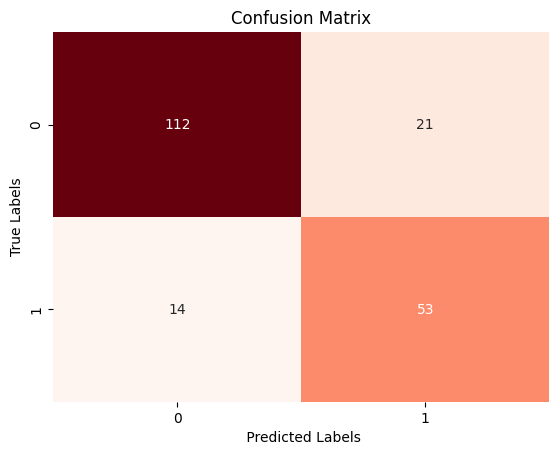

In [ ]:
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Reds",cbar=False)
plt.title("Confusion Matrix")
plt.xlabel(" Predicted Labels")
plt.ylabel("True Labels")